In [118]:
from sklearn.datasets import load_iris
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from math import sqrt
import operator as opt
from sklearn.cluster import KMeans

In [119]:
#导入数据集
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [120]:
#距离矩阵
def euclidDistance(x1, x2, sqrt_flag=False):
    res = np.sum((x1-x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res

def calEuclidDistanceMatrix(X):
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            S[i][j] = 1.0 * euclidDistance(X[i], X[j])
            S[j][i] = S[i][j]
    return S

In [121]:
#邻接矩阵
def myKNN(x,k):
    n=len(x)
    #初始化距离矩阵和相似度矩阵
    dis_matrix=np.zeros((n,n))
    w=np.zeros((n,n))
    #距离矩阵为对称矩阵
    for i in range(n):
        for j in range(i+1,n):
            dis_matrix[i][j]=dis_matrix[j][i]=np.sqrt(np.sum((x[i]-x[j])**2))
            #def dist(vec1,vec2):   return np.sqrt(np.sum((vec1-vec2)**2))
    #对距离矩阵进行遍历，可以取出每一行
    for idx,each in enumerate(dis_matrix):
        index_array=np.argsort(each)#返回从小到大排序后的下标
        w[idx][index_array[1:k+1]]=1   #除自己外的前k个，由于距离很近，相似度赋值为1
    tmp_w=np.transpose(w)
    w=(tmp_w+w)/2
    return w

In [122]:
def getEigVec(L,cluster_num):  #从拉普拉斯矩阵获得特征矩阵
    eigval,eigvec = np.linalg.eig(L)
    dim = len(eigval)
    dictEigval = dict(zip(eigval,range(0,dim)))
    kEig = np.sort(eigval)[0:cluster_num]
    ix = [dictEigval[k] for k in kEig]
    return eigval[ix],eigvec[:,ix]

In [123]:
#标准化的拉普拉斯矩阵
def calLaplacianMatrix(adjacentMatrix):

    # compute the Degree Matrix: D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)

    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # normailze
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [124]:
def q_neighbors(A,q=16):
    n = []
    for i in range(len(A)):
        inds = np.argsort(A[i])
        inds = inds[-q:-1]
        n.append(inds)
    return np.array(n)

In [125]:
Similarity = calEuclidDistanceMatrix(data_x)
A  = myKNN(Similarity,k=16)
qnn = q_neighbors(A)

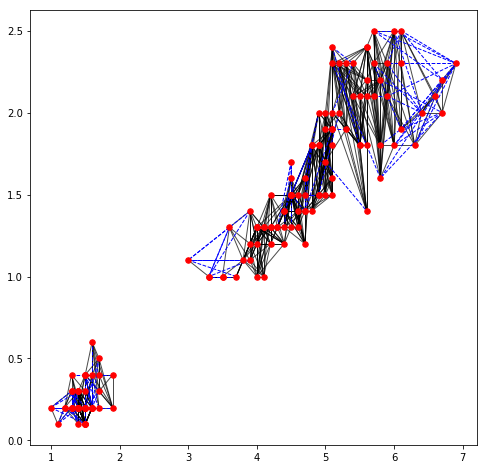

In [126]:
data = np.array(x)
data = data.T
pos = np.c_[data[2],data[3]]
plt.figure(figsize=(8,8))
G = nx.Graph() 
# 向图G添加节点和边
G.add_nodes_from([i for i in range(150)])
for i in range(len(A)):
    for j in range(len(A)):
        # 只有i是j的近邻且j是i的近邻，二者之间才有边
        if(i in qnn[j] and j in qnn[i]):
            G.add_edge(i,j,weight=A[i,j])
# 画出节点 
nx.draw_networkx_nodes(G, pos, node_color='r', node_size=30, node_shape='o')
# 将图G中的边按照权重分组
edges_list1=[]
edges_list2=[]
edges_list3=[]
for (u,v,d) in G.edges(data='weight'):
    if d > 0.95:
        edges_list1.append((u,v))
    elif d < 0.9:
        edges_list2.append((u,v))
    else:
        edges_list3.append((u,v))
# 按照分好的组，以不同样式画出边
nx.draw_networkx_edges(G, pos, edgelist=edges_list1, width=1, alpha=0.7, edge_color='k', style='solid')
nx.draw_networkx_edges(G, pos, edgelist=edges_list2, width=1, alpha=1.0, edge_color='b', style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=edges_list3, width=1, alpha=0.7, edge_color='g', style='solid')
plt.show()

In [127]:
#计算出每个节点度数，得到度矩阵D,对角线元素为每一行之和
def getD(w):
    n=len(w)
    D=np.diag(np.zeros(n))
    for i in range(n):
        D[i][i]=sum(w[i])
    return D

In [128]:
#获得特征矩阵之后，使用kmeans方法来对特征矩阵进行聚类，每个特征向量是特征矩阵的列
#把每行当成一个聚类样本数据，这样聚类就是最终结果
w=myKNN(x,5)
D=getD(w)
L=D-w
clf=KMeans(n_clusters=3,random_state=1)
eigval,eigvec=getEigVec(L,3)
s=clf.fit(eigvec)
#根据邻接矩阵产生的聚类结果
C=s.labels_

#计算正确率
count=0
for k in range(150):
    if C[k]==lable[k]:
        count=count+1
acc=float(count)/float(len(y))
print(acc)



0.9066666666666666
